In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [3]:
vocabulary_size = 10000
max_words = 500
batch_size = 32

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)

In [4]:
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

embed_size = 128

In [5]:
model = Sequential()
model.add(Embedding(vocabulary_size, embed_size, input_length = max_words))
model.add(LSTM(128, return_sequences = True))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(Dense(1, activation = 'sigmoid'))

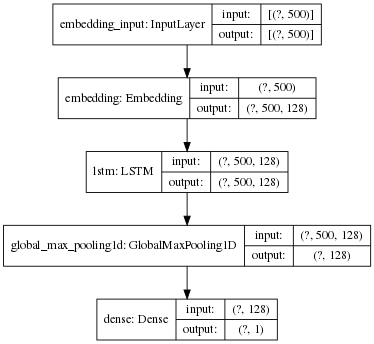

In [6]:
tf.keras.utils.plot_model(model, show_shapes = True, dpi = 64)

In [7]:
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]  
X_train, y_train = X_train[batch_size:], y_train[batch_size:]

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train,
          validation_data = (X_valid, y_valid),
          batch_size = batch_size, epochs = 3)

Epoch 1/3
781/781 [==============================] - 31s 40ms/step - loss: 0.3942 - accuracy: 0.8195 - val_loss: 0.1930 - val_accuracy: 0.9375
Epoch 2/3
781/781 [==============================] - 31s 40ms/step - loss: 0.2123 - accuracy: 0.9173 - val_loss: 0.2642 - val_accuracy: 0.9062
Epoch 3/3
781/781 [==============================] - 30s 39ms/step - loss: 0.1403 - accuracy: 0.9503 - val_loss: 0.2193 - val_accuracy: 0.9062


In [9]:
model.save('imdb')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: imdb/assets
